### Funciones Importantes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt;plt.style.use("seaborn")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# <Center> **Tarea 1**

  **<Center>Machine Learning**

  **<Center> José Miguel Muñoz Arias**


---



---



# Teoría y La empanada $\textit{Logísticamente}$ inteligente
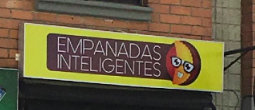

Para poder utilizar la sigmoide, vale comenzar por un breve recuento matemático de la función. Está definida como:
$$\sigma(z)\ \equiv\ \frac{1}{1+e^{-x}}$$
Para ver cómo se comporta:

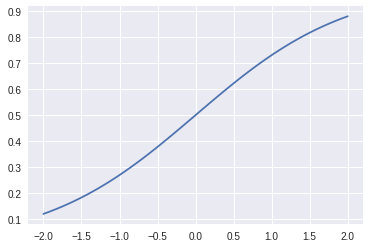

In [2]:
def sigmoide(z): return (1+np.exp(-z))**-1
plt.plot(np.linspace(-2,2),sigmoide(np.linspace(-2,2)))

## Proceso de aprendizaje

Supongamos que se utiliza como función de pérdida el error $$\mathcal{L}\equiv \text{Media cuadrática Media } (\epsilon_k)=(y_{s}-y_{real})^2/2$$

Que además se tiene la matriz de pesos $W$, y la tasa de aprendizaje $\alpha$

Para ver en qué dirección hay que desplazar los pesos para reducir el error, tenemos que aplicar la regla $\Delta$ generalizada:
$$\Delta W=-\alpha \ \partial_{W} \ \mathcal{L}$$

De esta forma, buscar la derivada se convierte, para la capa $(l)$ en 

$$\frac{\partial \mathcal{L}}{\partial W^{(l)}} = \underbrace{ \frac{\partial \mathcal{L}}{\partial \sigma}}_{\text {Parte que depende de la activación}} \cdot \overbrace{\frac{\partial \sigma}{\partial y_r^{(l)}}}^{\text{Derivada de la sigmoide}} \cdot \underbrace{\frac{\partial y_r^{(l)}}{\partial W^{(l)}}}_{\text{La función de activación anterior}} \; \; $$


Por ende, podemos usando que la sigmoide es que genera la sensación. Es decir, $y_s=\sigma(z)$ donde z es la combinación lineal de los pesos con las entradas de la capa anterior, denotadas como $(y_s^{(l-1)})$.

$$y_s^{(l)}=\sum_n W\cdot y_{r}^{(l-1)}$$

 Así, se puede buscar la derivada de la función usando:

$$\therefore \frac{\partial \sigma}{\partial y_s^{(l)}}=\frac{\partial \sigma}{\partial y_r^{(l)}}\cdot \frac{\partial y_s^{(l)}}{\partial y_r^{(l)}}$$


$$\Rightarrow \frac{\partial \sigma}{\partial y_s^{(l)}}=\Big(\frac{e^{-y_r^{(l-1)}}}{(1+e^{-y_r^{(l-1))}})^2}\Big)\cdot \frac{\partial y_s^{(l)}}{\partial y_r^{(l)}}$$
$$\Rightarrow \frac{\partial \sigma}{\partial y_s^{(l)}}=\Big(1-\frac{1}{(1+e^{-y_r^{(l-1))}})}\Big)\Big(\frac{1}{(1+e^{-y_r^{(l-1))}})}\Big)\cdot \frac{\partial y_s^{(l)}}{\partial y_r^{(l)}}$$

$$\Rightarrow \frac{\partial \sigma}{\partial y_s^{(l)}}=\Big(1-\sigma\Big)\Big(\sigma\Big)\cdot \frac{\partial y_s^{(l)}}{\partial y_r^{(l)}}$$

De esta forma, si llevamos esta expresión a la regla de la cadena para $\partial \mathcal{L}/\partial W^{(l)}$, se obtiene tras reordenar los diferenciales:

$$ \frac{\partial \mathcal{L}}{\partial W^{(l)}}=\frac{\partial \mathcal{L}}{\partial{y_s}}\Big(1-\sigma\Big)\Big(\sigma\Big)\cdot \frac{\partial y_r^{(l)}}{\partial W^{(l)}}$$

Ahora, por la forma en que se definión el error, sacar la derivada es sencillo:

$$\partial_{y_S} \mathcal{L}=\partial_{y_S}(y_{s}-y_{real})^2/2=(y_{s}-y_{real})$$

Finalmente, basta ver que el término $\frac{\partial y_r^{(l)}}{\partial W^{(l)}}$ corresponde al gradiente, más formalmente, si hablamos de un peso para las entradas:

$$\frac{\partial y_r^{(l)}}{\partial W_{\text{peso}}^{(l)}}\equiv \nabla y_r=X$$
O si se trata de un componente de bias:
$$\frac{\partial y_r^{(l)}}{\partial W_{\text{bias}}^{(l)}}\equiv \nabla y_r=1
$$

Por lo que desplazando:

$$ \frac{\partial \mathcal{L}}{\partial W_\text{peso}^{(l)}}=(y_s-y_r)*X*(1-\sigma)(\sigma)$$

$$\frac{\partial \mathcal{L}}{\partial W_\text{bias}^{(l)}}=(y_s-y_r)*(1-\sigma)(\sigma)$$

Por lo que la nueva regla de actualización que buscamos es:

$$\Delta W_\text{peso}=-\alpha \ (y_s-y_r)*X*(1-\sigma)(\sigma)$$
$$\Delta W_\text{bias}=-\alpha \ (y_s-y_r)*(1-\sigma)(\sigma)$$




---


# Preprocesamiento de Datos

Para procesar los datos, llevams a cabo la misma limpieza que en el Caso 3 de Clase

In [3]:
path="datosCredito.xlsx"
BDCA=pd.read_excel(path,sheet_name=0)
BDCN=pd.read_excel(path,sheet_name=1)

Tomamos los puntaje que no tengan puntaje

In [4]:
fpa=np.where(~np.isnan(BDCA["Puntaje"]))
fpn=np.where(~np.isnan(BDCN["Puntaje"]))

Busquemos los valores que si tengan valores numéricos

In [5]:
BDA=np.array(BDCA.iloc[fpa])
BDN=np.array(BDCN.iloc[fpn])
XA=np.vstack((BDA,BDN))
X=np.array([XA[:,1],XA[:,4],XA[:,5],XA[:,6],XA[:,9],XA[:,10],XA[:,25],XA[:,26],XA[:,27],XA[:,45]]).astype(float)
X1=np.transpose(X)

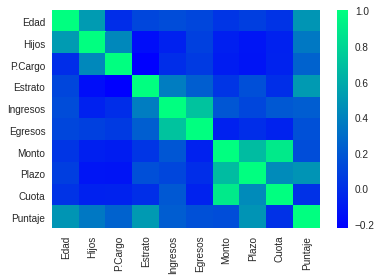

In [6]:
x_normed = X1 / X1.max(axis=0)
X2=pd.DataFrame(x_normed,columns=["Edad","Hijos","P.Cargo","Estrato","Ingresos","Egresos","Monto","Plazo","Cuota","Puntaje"])
corr = X2.corr()
sns.heatmap(corr,cmap="winter")

# Una implementación con OOP


En búsqueda de hacer un modelito un poco más versátil, hice una pequeña estructura en OOP que permite llamar con diferentes números de capas neuronas por capa y números de capa con diferentes funciones (por ahora, insulsa y logística). Los pesos para las actualizaciones los guardo en diccionarios (no va a ser para nada eficiente), pero funciona como Toy Model 

In [7]:
class Modelo:
  def nada(): pass
class EmpanadaInteligente(Modelo):

  def __init__(self,X_train, Y_train, layer_sizes, num_iters, alfa):
    self.X_train=X_train
    self.Y_train=Y_train
    self.alfa=alfa
    self.params={}
    self.num_iters=num_iters
    self.valores=[]
    self.Y_Pred=0

  def actAdelante(self, z,opcion=2): 
    if opcion==0 or opcion=="Lineal": return z
    elif opcion==1 or opcion=="relu": return np.maximum(0,z)
    elif opcion==2 or opcion=="Logistica": return 1/(1+np.exp(z))
    elif opcion==3 or opcion== "tanh":  a=np.exp(z);  return (a- a**-1)/(a+ a**-1)

  def actAtrasW(self,m,i,dZ,values,opcion=2): 
    if opcion==0 or opcion=="Lineal": return  1/m * np.dot(dZ,values['A' + str(i-1)].T)
    elif opcion==1 or opcion=="relu": print("No la he implementado todavía!"); return 0

    elif opcion==2 or opcion=="Logistica": 
      unos=(np.ones(values['A' + str(i-1)].shape)).astype(float)
      deriv=self.actAdelante(values['A' + str(i-1)])
      reto=deriv*(unos-deriv)
      return np.dot(dZ,reto.T)/m

    elif opcion==3 or opcion== "tanh": print("No la he implementado todavía!"); return 0

  def actAtrasB(self,m,i,dZ,values,layers=0,opcion=2): 
    if opcion==0 or opcion=="Lineal": return 1/m * np.sum(dZ, axis=1, keepdims=True)
    elif opcion==1 or opcion=="relu": print("No la he implementado todavía!"); return 0
    elif opcion==2 or opcion=="Logistica":return 1/m * np.sum((values['A' + str(i)] - self.Y_train[layers,]))*np.sum(dZ, axis=1, keepdims=True)
    elif opcion==3 or opcion== "tanh": print("No la he implementado todavía!"); return 0


  def PropagacionAtras(self,values,opcion=2): 
    m = len(self.Y_train)
    layers = int(len(self.params)/2)
    grads = {}
    for i in range(layers,0,-1):
        if i==layers:
            dA = 1/m * (values['A' + str(i)] - self.Y_train[layers,])
            dZ = dA
        else:
            dA = np.dot(self.params['W' + str(i+1)].T, dZ)
            dZ = np.multiply(dA, np.where(values['A' + str(i)]>=0, 1, 0))
        if i==1: #La primera capa siempre va a ser Lineal
            grads['W' + str(i)] = 1/m * np.dot(dZ, self.X_train[layers,])
            grads['B' + str(i)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        else:
            grads['W' + str(i)] = self.actAtrasW(m,i,dZ,values,opcion=2)
            grads['B' + str(i)] = self.actAtrasB(m,i,dZ,values,layers,opcion=2)
    return grads

  def inicializarParams(self,tama_capas):
    
    for i in range(1, len(tama_capas)):
        self.params['W' + str(i)] = np.random.randn(tama_capas[i], tama_capas[i-1])*0.001
        self.params['B' + str(i)] = np.random.randn(tama_capas[i],1)*0.001
    return self.params    

  def propagacionAdelante(self,valores=[],X=[],lay=0): 
    layers = int(len(self.params)/2)
    values = {}
    for i in range(1, layers+1):
        if i==1 and lay==0:
            values['Z' + str(i)] = np.dot(self.params['W' + str(i)], self.X_train) + self.params['B' + str(i)]
            values['A' + str(i)] = self.actAdelante(values['Z' + str(i)],opcion=2)
        else:
            values['Z' + str(i)] = np.dot(self.params['W' + str(i)], values['A' + str(i-1)]) + self.params['B' + str(i)]
            if i==layers:                values['A' + str(i)] = values['Z' + str(i)]
            else:                values['A' + str(i)] = self.actAdelante(values['Z' + str(i)],opcion=2)
    return values


  def actualizar(self, grads): 
    layers = int(len(self.params)/2)
    params_updated = {}
    for i in range(1,layers+1):
        params_updated['W' + str(i)] = self.params['W' + str(i)] - self.alfa * grads['W' + str(i)]
        params_updated['B' + str(i)] = self.params['B' + str(i)] - self.alfa * grads['B' + str(i)]
    return params_updated
    
  def costo(self,values,i=0):
    layers = len(values)//2
    self.Y_pred = values['A' + str(layers)]
    cost = 1/(2*len(Y_train)) * np.sum(np.square(self.Y_pred.T - Y_train[layers,]))
    return cost,self.Y_Pred
  
  def entrena(self):
    self.params = self.inicializarParams(layer_sizes)
    nums=[]
    layers = int(len(self.params)/2)
    for i in range(num_iters):
        values = self.propagacionAdelante( )
        cost,ypred = self.costo(values,i)
        grads = self.PropagacionAtras( values)
        self.params = self.actualizar( grads)
        if i%1000==0: print('Costo en i ' + str(i+1) + ' = ' + str(cost) + '\n') #Descomentar para monitorear el avance de los costos
        nums.append(cost)
    return self.params,nums

  def grafica_costos(self,listaCostos):
    fig,ax=plt.subplots()
    x=np.arange(0,len(listaCostos))
    ax.plot(x,listaCostos)
    ax.axis([None,None,None, None])
    ax.set(xlabel="Iteración",ylabel="Costo"); ax.set_title("Comportamiento del entrenamiento")



---



---


## Uso del modelo




Costo en i 1 = 0.0020973847379554002

Costo en i 1001 = 0.0003449574814179814

Costo en i 2001 = 4.807193758352801e-05

Costo en i 3001 = 6.292468927875616e-06

Costo en i 4001 = 8.05109874381112e-07

Costo en i 5001 = 1.0217432250291861e-07



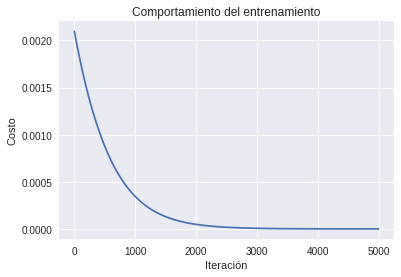

In [8]:
XD=x_normed[:,0:9]
yd=x_normed[:,9]
NE=9; ND=127

X_train,X_test,Y_train,Y_test = train_test_split(XD, yd, test_size = 0.2)
# Declaro la entrada con 173 inputs y 3 capas uciltas, todas con funciones logísticas
layer_sizes = [173, 173, 10, 100,1]      # Número de Funciones Logísticas  por cada capa

num_iters = 5001                               
alfa = 0.3

modelo=EmpanadaInteligente(X_train, Y_train, layer_sizes, num_iters, alfa)
params,costos = modelo.entrena()
modelo.grafica_costos(costos)

# Una implementación con el modelo de clase

Mucho menos aplicable a otras situaciones..., pero podemos llamar el modelo que se realizó en clase con las reglas delta generalizadas aplicadas a la función sigmoide, el resultado es bastante positivo:


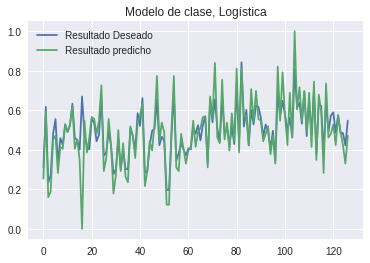

In [9]:
NE=9; ND=127
XD=x_normed[:,0:9]
yd=x_normed[:,9]
C=np.random.normal(0,1,NE) 
alfa=0.1
ys=np.zeros((ND,1))
YR=np.zeros((ND,1))

#Para la función sigmoide: 
def activacion(z):return 1/(1+np.exp(-z))
def derivadaActivacion(z):return activacion(z)*(1-activacion(z))



def entrenar(C=C,alfa=alfa,nReps=1000):
  errores=[]
  for i in range(nReps):
    acumulaError=0
    for k in range(ND):
      ys[k,]=np.dot(C,XD[k,].reshape(NE,1))
      yr=activacion(ys[k,])
      np.append(YR,ys)
      ek=yd[k,]-ys[k,]
      acumulaError+=np.sum(0.5*ek**2)

      C+=alfa*ek*derivadaActivacion(yr)*XD[k,]
    errores.append(acumulaError)
  return errores

errores=entrenar()
plt.plot(ys,label="Resultado Deseado");plt.plot(yd[:int(len(ys))], label="Resultado predicho")
plt.title("Modelo de clase, Logística");plt.legend()
plt.show()



Veamos cómo entrena el modelo de clase

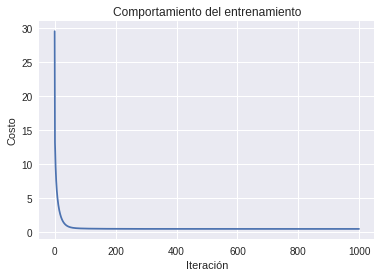

In [10]:
def grafica_costos(listaCostos=errores,nReps=1000):
    fig,ax=plt.subplots()
    x=np.arange(0,nReps)
    ax.plot(x,listaCostos)
    ax.set(xlabel="Iteración",ylabel="Costo"); ax.set_title("Comportamiento del entrenamiento")
grafica_costos(errores)